# Load the irregularity tools module:

In [1]:
include("IrregularityTools.jl")

irregularity_marginal (generic function with 5 methods)

# Defining a toy image:

Let us construct a toy image similar to the one presented by E. Chevalier and J. Angulo in "The Irregularity Issue of Total Orders on Metric Spaces and Its Consequences for Mathematical Morphology", Journal of Mathematical Imaging and Vision, 54(3):344–357, 3 (2016). doi: 10.1007/s10851-015-0607-7.

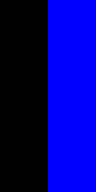

In [2]:
function black_and_blue_random(pr)
    Nh = 64
    Nw = 16
    img_r = zeros(RGB{N0f8}, Nh, Nw)
    img_r[rand(Nh,Nw).<=pr] .= RGB(0.005,0,0)
    img_b = Array{RGB{N0f8},2}(undef,Nh,Nw)
    img_b .= RGB(0,0,1)
    return hcat(img_r,img_b)
end

imI = black_and_blue_random(0.3)

Let us now define the dilation by a cross structuring element and compute the dilation of the previous image using the lexicographical RGB ordering. The lexicographical dilation is implemented in the irregularity tools module using a reduced ordering defined by $h_{RGB}(x) = x_1 + x_2/255 + x_3/65025$. Precisely, a reduced ordering approach is computed by providing the input image, the reduced mapping, and the morphological operator using the command hMM as follows:

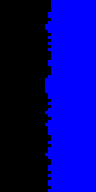

In [3]:
function mydilate(img)
    # Cross-structuring element!
    d1 = dilate(img,1)
    d2 = dilate(img,2)
    return max.(d1,d2)
end

imJ = hMM(imI, h_rgb, mydilate)

# Computing the Global Irregularity Index

Compute the global irregularity index of the toy image analytically, that is, by solving the optimal transportation problem using a linear programming solver (JuMP + Clp):

In [4]:
@time global_irregularity(imI,imJ)

Global irregularity index computed analytically (with p = 1).
 45.247632 seconds (80.92 M allocations: 3.998 GiB, 4.11% gc time)


0.5384526718966305

Alternatively, the global irregularity index can be computed using the Sinkhorn method or its stabilized version, both available at OptimalTransport library.

In [5]:
@time global_irregularity(imI,imJ,"sinkhorn",1.e-2)

Global irregularity index computed using sinkhorn (with epsilon = 0.01 and p = 1)
  0.006364 seconds (749 allocations: 158.523 KiB)


0.5319090436900936

In [6]:
@time global_irregularity(imI,imJ,"stabilized_sinkhorn",1.e-3)

Global irregularity index computed using stabilized_sinkhorn (with epsilon = 0.001 and p = 1)
  0.002272 seconds (4.41 k allocations: 423.297 KiB)


0.5384526718966305